In [1]:
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13, 4)
from GeneralModel import *

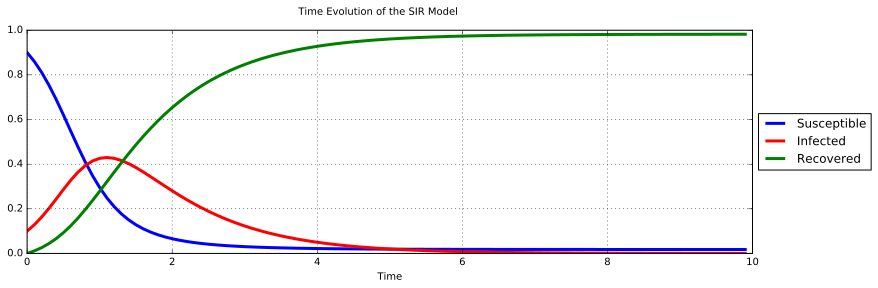

In [2]:
SIR = GeneralModel(Name="SIR", tstart=0, tend=10, dt=0.1, beta=4, gamma=1, N=1)
SIR.Initialize([0.9,0.1,0])
SIR.Simulate()
SIR.PlotState(states={1:"S",2:"I",3:"R"},colors=["b","r","g"],legend=["Susceptible","Infected","Recovered"])

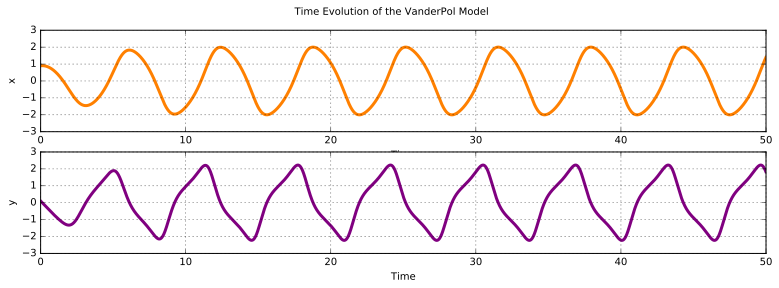

In [4]:
VDP = GeneralModel(Name="VanderPol", tstart=0, tend=50, dt=0.01)
VDP.Initialize([0.9,0.1])
VDP.Simulate()
VDP.PlotState(states={1:"x",2:"y"})

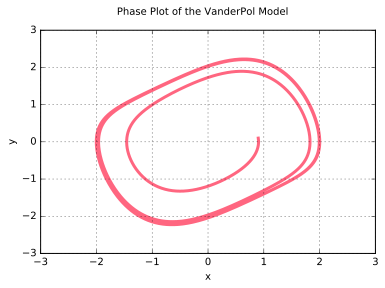

In [11]:
plt.rcParams["figure.figsize"] = (6, 4)
VDP.PlotPhase(color=[1,0.4,0.5])